In [193]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [2]:
scores = pd.read_csv('pd_data/judge_scores.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(scores)

270813

In [3]:
goes = scores[scores.is_comp == 0]
comp = scores[scores.is_comp == 1]

In [4]:
comp[comp.judge_score <= 2.]

,Unnamed: 0,all_scores,country,discipline,elt_bonus,elt_bv,elt_info,elt_name,elt_number,elt_points,...,overall_rank,season,segment_name,segment_rank,skater,start_order,trimmed_mean,judge_country,same_country,judge_skater_country
186282,186282,"7.75,6.5,6.75,7.0,7.25,7.0,0.25,7.5,7.5",USA,pairs,NaN,NaN,NaN,Performance,NaN,NaN,...,5,2017,gpfra2016_pairs_short,5,Marissa CASTELLI / Mervin TRAN,2,7.071429,AUT,0,AUTUSA
198675,198675,"7.0,6.75,7.5,7.75,7.25,7.5,0.25,7.25,7.25",FRA,men,NaN,NaN,NaN,Interpretation,NaN,NaN,...,9,2017,ec2017_men_free,10,Chafik BESSEGHIER,14,7.214286,SLO,0,SLOFRA
240256,240256,"9.75,9.5,9.0,9.25,9.5,8.5,9.5,0.25,8.75",CAN,ice_dance,NaN,NaN,NaN,Interpretation,NaN,NaN,...,4,2018,gpfra2017_ice_dance_short,5,Kaitlyn WEAVER / Andrew POJE,8,9.142857,CAN,1,CANCAN
260826,260826,"7.0,7.0,6.75,0.5,5.5,6.75,6.25,7.0,7.0",CAN,pairs,NaN,NaN,NaN,Skating Skills,NaN,NaN,...,7,2018,fc2018_pairs_free,7,Camille RUEST / Andrew WOLFE,1,6.607143,USA,0,USACAN


In [8]:
len(goes.skater.unique())

343

In [10]:
goes_skater_same_country = ols('judge_score ~ skater + same_country', data=goes).fit()
goes_skater_same_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:15:18   Log-Likelihood:            -2.8747e+05
No. Observations:              173158   AIC:                         5.756e+05
Df Residuals:                  172814   BIC:                         5.791e+05
Df Model:                         343                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.8078      0.095     -8.506      0.000      -0.994      -0.622
skater[T.Adam RIPPON]                                      1.9790      0.102     19.494      0.000       1.780       2.178
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                 0.5182      0.145      3.572      0.000       0.234       0.802
skater[T.Adele MORRISON / Demid ROKACHEV]                  0.1722      0.148      1.164      0.245      -0.118       0.462
skater[T.Aimee BUCHANAN]                                   0.1808      0.148      1.222      0.222      -0.109       0.471
skater[T.Aiza MAMBEKOVA]                                   0.7321      0.126      5.796      0.000       0.484       0.980
skater[T.Alaine CHARTRAND]                                 0.7034      0.103      6.832      0.000       0.502       0.905
skater[T.Alena LEONOVA]                                    1.2336      0.110     11.177      0.000       1.017       1.450
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            1.6759      0.104     16.040      0.000       1.471       1.881
skater[T.Alexander BOROVOJ]                                0.9983      0.187      5.352      0.000       0.633       1.364
skater[T.Alexander MAJOROV]                                0.9142      0.104      8.788      0.000       0.710       1.118
skater[T.Alexander MASZLJANKO]                             1.1252      0.187      6.033      0.000       0.760       1.491
skater[T.Alexander PETROV]                                 1.0593      0.110      9.660      0.000       0.844       1.274
skater[T.Alexander SAMARIN]                                1.1684      0.106     11.005      0.000       0.960       1.377
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.9048      0.107     17.847      0.000       1.696       2.114
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.6405      0.148     11.085      0.000       1.350       1.931
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 2.6791      0.104     25.710      0.000       2.475       2.883
skater[T.Alexei BYCHENKO]                                  1.4246      0.101     14.144      0.000       1.227       1.622
skater[T.Alexia PAGANINI]                                  1.1600      0.117      9.887      0.000       0.930       1.390
skater[T.Alicia PINEAULT]                                  0.9061      0.136      6.660      0.000       0.639       1.173
skater[T.Alina ZAGITOVA]                                   2.5607      0.104     24.508      0.000       2.356       2.765
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.6165      0.103     15.636      0.000       1.414       1.819
skater[T

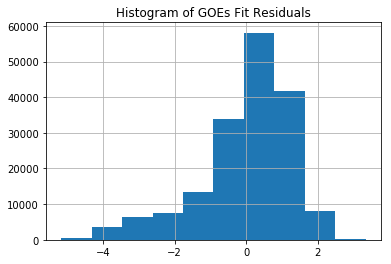

In [19]:
goes_skater_same_country.resid.hist()
plt.title('Histogram of GOEs Fit Residuals')

In [22]:
goes_skater_same_country.fittedvalues[0], goes_skater_same_country.resid[0]

(1.1368802882727747, -2.1368802882727747)

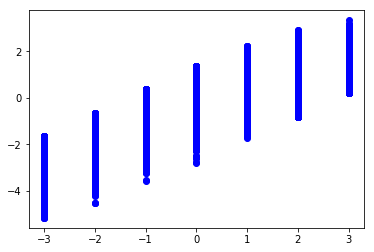

In [27]:
plt.plot(goes.judge_score, goes_skater_same_country.resid, 'bo')

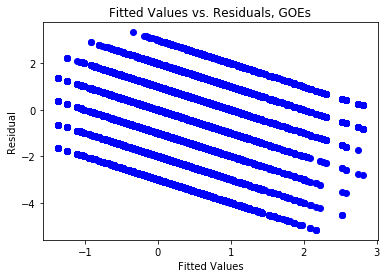

In [17]:
plt.plot(goes_skater_same_country.fittedvalues, goes_skater_same_country.resid, 'bo')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Fitted Values vs. Residuals, GOEs')

In [5]:
comp = comp[comp.judge_score > 2.]
comp_skater_same_country = ols('judge_score ~ skater + same_country', data=comp).fit()
comp_skater_same_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1703.
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:42:09   Log-Likelihood:                -67755.
No. Observations:               97651   AIC:                         1.362e+05
Df Residuals:                   97307   BIC:                         1.395e+05
Df Model:                         343                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  5.6955      0.051    111.367      0.000       5.595       5.796
skater[T.Adam RIPPON]                                      2.8906      0.055     52.875      0.000       2.783       2.998
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.3553      0.066     -5.382      0.000      -0.485      -0.226
skater[T.Adele MORRISON / Demid ROKACHEV]                 -1.3500      0.072    -18.667      0.000      -1.492      -1.208
skater[T.Aimee BUCHANAN]                                  -1.1510      0.072    -15.915      0.000      -1.293      -1.009
skater[T.Aiza MAMBEKOVA]                                  -0.2454      0.066     -3.717      0.000      -0.375      -0.116
skater[T.Alaine CHARTRAND]                                 1.3569      0.055     24.567      0.000       1.249       1.465
skater[T.Alena LEONOVA]                                    1.6093      0.059     27.253      0.000       1.494       1.725
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.1070      0.056     37.613      0.000       1.997       2.217
skater[T.Alexander BOROVOJ]                               -0.6399      0.089     -7.224      0.000      -0.814      -0.466
skater[T.Alexander MAJOROV]                                1.3357      0.056     23.844      0.000       1.226       1.446
skater[T.Alexander MASZLJANKO]                            -0.4232      0.089     -4.778      0.000      -0.597      -0.250
skater[T.Alexander PETROV]                                 1.4972      0.059     25.356      0.000       1.381       1.613
skater[T.Alexander SAMARIN]                                2.0333      0.057     35.563      0.000       1.921       2.145
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8504      0.056     33.285      0.000       1.741       1.959
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.6417      0.072     22.700      0.000       1.500       1.783
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 2.9963      0.055     54.808      0.000       2.889       3.103
skater[T.Alexei BYCHENKO]                                  2.1994      0.054     40.549      0.000       2.093       2.306
skater[T.Alexia PAGANINI]                                  0.4860      0.063      7.760      0.000       0.363       0.609
skater[T.Alicia PINEAULT]                                  0.6278      0.072      8.681      0.000       0.486       0.770
skater[T.Alina ZAGITOVA]                                   3.0507      0.056     54.459      0.000       2.941       3.161
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.5169      0.054     27.966      0.000       1.411       1.623
skater[T

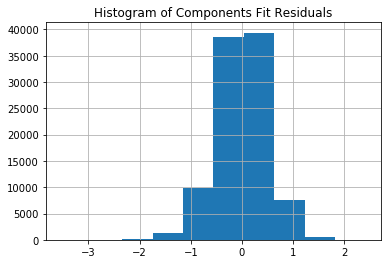

In [35]:
comp_skater_same_country.resid.hist()
plt.title('Histogram of Components Fit Residuals')

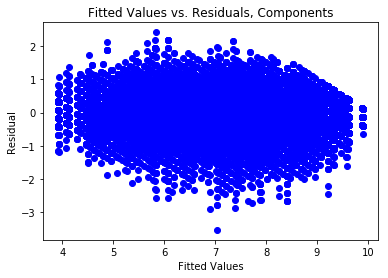

In [37]:
plt.plot(comp_skater_same_country.fittedvalues, comp_skater_same_country.resid, 'bo')
plt.title('Fitted Values vs. Residuals, Components')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

In [123]:
sm.stats.diagnostic.kstest_normal(pd.Series(comp_skater_same_country.resid_pearson))

(0.035062793033783513, 1.0880268139388637e-314)

In [118]:
sm.stats.diagnostic.kstest_normal(comp_skater_same_country.resid)

(0.035062793033783513, 1.0880268139388637e-314)

In [40]:
comp_skater_judge_country = ols('judge_score ~ skater + judge + same_country', data=comp).fit()
comp_skater_judge_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:45:08   Log-Likelihood:                -63502.
No. Observations:               97651   AIC:                         1.282e+05
Df Residuals:                   97064   BIC:                         1.337e+05
Df Model:                         586                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  6.1438      0.054    113.605      0.000       6.038       6.250
skater[T.Adam RIPPON]                                      2.9773      0.053     56.307      0.000       2.874       3.081
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.3448      0.064     -5.383      0.000      -0.470      -0.219
skater[T.Adele MORRISON / Demid ROKACHEV]                 -1.2294      0.070    -17.519      0.000      -1.367      -1.092
skater[T.Aimee BUCHANAN]                                  -1.0792      0.070    -15.367      0.000      -1.217      -0.942
skater[T.Aiza MAMBEKOVA]                                  -0.1282      0.064     -2.000      0.045      -0.254      -0.003
skater[T.Alaine CHARTRAND]                                 1.5161      0.054     28.307      0.000       1.411       1.621
skater[T.Alena LEONOVA]                                    1.6870      0.057     29.479      0.000       1.575       1.799
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.1650      0.054     39.864      0.000       2.059       2.271
skater[T.Alexander BOROVOJ]                               -0.5441      0.086     -6.347      0.000      -0.712      -0.376
skater[T.Alexander MAJOROV]                                1.4016      0.054     25.831      0.000       1.295       1.508
skater[T.Alexander MASZLJANKO]                            -0.4215      0.086     -4.903      0.000      -0.590      -0.253
skater[T.Alexander PETROV]                                 1.6414      0.057     28.708      0.000       1.529       1.753
skater[T.Alexander SAMARIN]                                2.0991      0.055     37.879      0.000       1.991       2.208
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8862      0.054     34.892      0.000       1.780       1.992
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.7826      0.070     25.377      0.000       1.645       1.920
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 3.0507      0.053     57.401      0.000       2.946       3.155
skater[T.Alexei BYCHENKO]                                  2.2569      0.052     42.990      0.000       2.154       2.360
skater[T.Alexia PAGANINI]                                  0.5348      0.061      8.807      0.000       0.416       0.654
skater[T.Alicia PINEAULT]                                  0.7967      0.070     11.319      0.000       0.659       0.935
skater[T.Alina ZAGITOVA]                                   3.1105      0.054     57.342      0.000       3.004       3.217
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.5712      0.053     29.822      0.000       1.468       1.675
skater[T

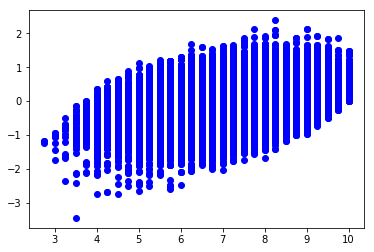

In [43]:
plt.plot(comp.judge_score, comp_skater_judge_country.resid, 'bo')

In [41]:
sm.stats.anova_lm(comp_skater_same_country, comp_skater_judge_country)

/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,97307.0,22901.683655,0.0,NaN,NaN,NaN
1,97064.0,20991.415437,243.0,1910.268218,36.35001,0.0


In [45]:
len(comp.judge.unique())

244

In [46]:
comp_owg = comp[comp.segment_name.str.contains('owg2018')]

In [12]:
for judge in comp_owg.judge.unique():
    judge_scores = comp_owg[comp_owg.judge == judge]
    if len(judge_scores.discipline.unique()) != 1:
        print judge, judge_scores.discipline.unique()

Agita ABELE ['men' 'ladies']
Yuriy GUSKOV ['men' 'ladies']
Albert ZAYDMAN ['men' 'ice_dance']
Elena FOMINA ['ladies' 'pairs']


In [52]:
comp_owg['uid'] = comp_owg.apply(lambda row: '{0},{1},{2}'.format(row.skater, row.segment_name, row.elt_name), axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
comp_owg['judge_country_bias'] = comp_owg.apply(
    lambda row: row.judge + ':' + row.judge_country + ',' + row.country, axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
comp_owg_ladies = comp_owg[comp_owg.discipline == 'ladies']

In [112]:
comp_owg_dance = comp_owg[comp_owg.discipline == 'ice_dance']

In [308]:
df = comp_owg[comp_owg.discipline == 'pairs']
test_index = set()
for skater in df.skater.unique():
    test_index.add(np.random.choice(df[df.skater == skater].index))
# for judge in df.judge.unique():
#     test_index.add(np.random.choice(df[df.judge == judge].index))
for judge_country in df.judge_country_bias.unique():
    test_index.add(np.random.choice(df[df.judge_country_bias == judge_country].index))

In [309]:
X = pd.concat([pd.get_dummies(df.uid),
               pd.get_dummies(df.judge),
               pd.get_dummies(df.country),
               pd.get_dummies(df.judge_country_bias)],
              axis=1)

In [310]:
# test_index = np.random.choice(X.index, size=430)
X_test = X[X.index.isin(test_index)]
X_train = X[~X.index.isin(test_index)]
y_test = df[df.index.isin(test_index)].judge_score
y_train = df[~df.index.isin(test_index)].judge_score

In [311]:
len(X_test), len(y_test), len(X_train), len(y_train)

(181, 181, 1529, 1529)

In [123]:
len(X_train.columns)

455

In [312]:
model = Ridge()
model.fit(X_train, y_train)
print model.score(X_train, y_train), model.score(X_test, y_test)
# modemodel.predict(X_test)
model.intercept_
params = zip(X.columns, model.coef_)

0.945346363009 0.940850441804


In [313]:
params

[('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_free,Composition',
  0.020725834511391417),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_free,Interpretation',
  -0.12927416548860893),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_free,Performance',
  -0.26966041793234186),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_free,Skating Skills',
  -0.029442334406066573),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_free,Transitions',
  -0.066414338128072833),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_short,Composition',
  0.15197471357738243),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_short,Interpretation',
  0.19949461802351875),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_short,Performance',
  0.11356945538341112),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_short,Skating Skills',
  0.22984953763780974),
 ('Alexa SCIMECA KNIERIM / Chris KNIERIM,owg2018_pairs_short,Transitions',
  -0.173662867829906

In [314]:
for country in df.country.unique():
    for param, estimate in params:
        if param == country:
            print param, estimate
        if ',' + country in param:
            print param, estimate
    print

CHN 0.90132220007
Anna KANTOR:ISR,CHN -0.102015734426
Anthony LEROY:FRA,CHN 0.133606030986
Deborah NOYES:AUS,CHN 0.167504237338
Elena FOMINA:RUS,CHN -0.146826571789
Elke TREITZ:GER,CHN -0.0611116389298
Feng HUANG:CHN,CHN 0.324358192004
Jana BAUDYSOVA:CZE,CHN 0.0956967415228
Jeff LUKASIK:CAN,CHN 0.0431488766088
Pekka LESKINEN:FIN,CHN 0.0768430717087
Tamie K. CAMPBELL:USA,CHN 0.170737360463
Thomas BIEGLER:AUT,CHN -0.0772696306739
Walter TOIGO:ITA,CHN 0.111284542419
Zsuzsanna VIKARNE-HOMOLYA:HUN,CHN 0.165366722839

RUS 0.878046544909
Anna KANTOR:ISR,RUS 0.153358549029
Anthony LEROY:FRA,RUS 0.176039743469
Deborah NOYES:AUS,RUS 0.146091411573
Elena FOMINA:RUS,RUS 0.205700891528
Elke TREITZ:GER,RUS -0.147155265923
Feng HUANG:CHN,RUS -0.230067953293
Jana BAUDYSOVA:CZE,RUS 0.26475933685
Jeff LUKASIK:CAN,RUS 0.00374704065993
Pekka LESKINEN:FIN,RUS 0.000547072211545
Tamie K. CAMPBELL:USA,RUS -0.268620116893
Thomas BIEGLER:AUT,RUS -0.0987886598846
Walter TOIGO:ITA,RUS 0.456211064679
Zsuzsanna VIK

In [174]:
emerson = ols('judge_score ~ uid + judge + judge_country_bias', data=comp_owg_dance).fit()
emerson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:47:01   Log-Likelihood:                 473.50
No. Observations:                1980   AIC:                            -131.0
Df Residuals:                    1572   BIC:                             2150.
Df Model:                         407                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 8.4705      0.037    230.077      0.000       8.398       8.543
uid[T.Adel TANKOVA / Ronald ZILBERBERG,owg2018_ice_dance_short,Interpretation]           -0.3333      0.101     -3.307      0.001      -0.531      -0.136
uid[T.Adel TANKOVA / Ronald ZILBERBERG,owg2018_ice_dance_short,Performance]              -0.1111      0.101     -1.102      0.270      -0.309       0.087
uid[T.Adel TANKOVA / Ronald ZILBERBERG,owg2018_ice_dance_short,Skating Skills]           -0.1111      0.101     -1.102      0.270      -0.309       0.087
uid[T.Adel TANKOVA / Ronald ZILBERBERG,owg2018_ice_dance_short,Transitions]              -0.2222      0.101     -2.205      0.028      -0.420      -0.025
uid[T.Alexandra NAZAROVA / Maxim NIKITIN,owg2018_ice_dance_short,Composition]            -0.1589      0.067     -2.367      0.018      -0.291      -0.027
uid[T.Alexandra NAZAROVA / Maxim NIKITIN,owg2018_ice_dance_short,Interpretation]         -0.1589      0.067     -2.367      0.018      -0.291      -0.027
uid[T.Alexandra NAZAROVA / Maxim NIKITIN,owg2018_ice_dance_short,Performance]            -0.1589      0.067     -2.367      0.018      -0.291      -0.027
uid[T.Alexandra NAZAROVA / Maxim NIKITIN,owg2018_ice_dance_short,Skating Skills]         -0.2700      0.067     -4.023      0.000      -0.402      -0.138
uid[T.Alexandra NAZAROVA / Maxim NIKITIN,owg2018_ice_dance_short,Transitions]            -0.4645      0.067     -6.919      0.000      -0.596      -0.333
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_free,Composition]                   -0.1795      0.072     -2.495      0.013      -0.321      -0.038
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_free,Interpretation]                -0.2906      0.072     -4.039      0.000      -0.432      -0.150
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_free,Performance]                   -0.4573      0.072     -6.355      0.000      -0.598      -0.316
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_free,Skating Skills]                -0.4295      0.072     -5.969      0.000      -0.571      -0.288
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_free,Transitions]                   -0.6240      0.072     -8.672      0.000      -0.765      -0.483
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_short,Composition]                  -0.1773      0.072     -2.469      0.014      -0.318      -0.036
uid[T.Alisa AGAFONOVA / Alper UCAR,owg2018_ice_dance_short,Interpretation]               -0.4273      0.072     -5.949      0.000      -0.568      -0.286
uid

In [179]:
emerson.params[emerson.params.index.str.contains('SHIBUTANI')] + emerson.params.Intercept

uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_free,Composition]        8.966030
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_free,Interpretation]     9.021586
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_free,Performance]        9.077141
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_free,Skating Skills]     9.049364
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_free,Transitions]        8.827141
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_short,Composition]       8.906030
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_short,Interpretation]    8.989364
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_short,Performance]       9.100475
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_short,Skating Skills]    8.961586
uid[T.Maia SHIBUTANI / Alex SHIBUTANI,owg2018_ice_dance_short,Transitions]       8.767141
dtype: float64

In [181]:
emerson.params[emerson.params.index.str.contains(',USA')]

judge_country_bias[T.Albert ZAYDMAN:ISR,USA]          0.405081
judge_country_bias[T.Anastassiya MAKAROVA:UKR,USA]    1.380138
judge_country_bias[T.Christine HURTH:FRA,USA]         0.956990
judge_country_bias[T.Kaoru TAKINO:JPN,USA]            0.905786
judge_country_bias[T.Leanna CARON:CAN,USA]            1.051388
judge_country_bias[T.Maira ABASOVA:RUS,USA]           0.640508
judge_country_bias[T.Malgorzata SOBKOW:POL,USA]       0.404181
judge_country_bias[T.Marta OLOZAGARRE:ESP,USA]        0.846443
judge_country_bias[T.Sharon ROGERS:USA,USA]           1.167591
judge_country_bias[T.Tanay OZKAN:TUR,USA]             0.812730
judge_country_bias[T.Tianyi ZHANG:CHN,USA]            0.972038
judge_country_bias[T.Vladimir CUCHRAN:SVK,USA]        0.722038
judge_country_bias[T.Walter ZUCCARO:ITA,USA]          0.868101
dtype: float64

In [201]:
np.sum(map(lambda (pred, actual): (pred-actual)**2, zip(model.predict(X_test), y_test)))

14.304190961311971

In [133]:
np.sum(map(lambda (pred, actual): (pred-actual)**2, zip(lin_reg.predict(X_test), y_test)))

13.435910957604889

In [235]:
coefficients = [param[0] for param in params]

In [315]:
param_dict = pd.DataFrame(params)

In [316]:
param_dict.rename({0: 'predictor', 1: 'estimate'}, axis=1, inplace=True)

In [252]:
param_dict[param_dict.predictor == 'RUS'].estimate.values

array([ 0.79674619])

In [258]:
skater_params[skater_params.predictor.str.contains('short')].estimate.sum()

2.7225837308649816

In [324]:
actual_scores = df.groupby(['segment_name', 'skater', 'elt_name']).elt_score.mean()
tech_short = goes[goes.segment_name == 'owg2018_pairs_short'].groupby(['skater', 'elt_number']).elt_points.mean()
tech_free = goes[goes.segment_name == 'owg2018_pairs_free'].groupby(['skater', 'elt_number']).elt_points.mean()
results = []
for skater in df.skater.unique():
    tech_score = tech_short[skater].sum() + tech_free[skater].sum()
    comp_score = actual_scores['owg2018_pairs_short'][skater].sum() * 0.8
    if skater in actual_scores['owg2018_pairs_free']:
        comp_score += actual_scores['owg2018_pairs_free'][skater].sum() * 1.6
    skater_params = param_dict[param_dict.predictor.str.contains(skater)]
    country = df[df.skater == skater].country.unique()[0]
    country_effect = param_dict[param_dict.predictor == country].estimate.values[0]
    
    short_estimate = model.intercept_ * 5
    short_estimate += 5 * country_effect
    short_estimate += skater_params[skater_params.predictor.str.contains('short')].estimate.sum()
    short_estimate *= 0.8
    
    estimate = short_estimate
    if 'owg2018_pairs_free' in df[df.skater == skater].segment_name.unique():
        free_estimate = model.intercept_ * 5
        free_estimate += 5 * country_effect
        free_estimate += skater_params[skater_params.predictor.str.contains('free')].estimate.sum()
        free_estimate *= 1.6
        estimate += free_estimate
    print skater, country, tech_score
    print ' actual comp: %0.2f' % comp_score, 'estimated comp: %0.2f' % estimate
    print ' actual total: %0.2f' % (tech_score + comp_score), 'estimated total: %0.2f' % (tech_score + estimate)
    results.append({
        'skater': skater,
        'country': country,
        'tech_score': tech_score,
        'actual_comp_score': comp_score,
        'estimate_comp_score': estimate,
        'actual_total': tech_score + comp_score,
        'estimate_total': tech_score + estimate,
    })

Wenjing SUI / Cong HAN CHN 120.78
 actual comp: 114.67 estimated comp: 111.80
 actual total: 235.45 estimated total: 232.58
Evgenia TARASOVA / Vladimir MOROZOV RUS 114.05
 actual comp: 111.89 estimated comp: 110.01
 actual total: 225.94 estimated total: 224.06
Meagan DUHAMEL / Eric RADFORD CAN 121.12
 actual comp: 109.04 estimated comp: 107.56
 actual total: 230.16 estimated total: 228.68
Aljona SAVCHENKO / Bruno MASSOT GER 121.23
 actual comp: 114.68 estimated comp: 112.58
 actual total: 235.91 estimated total: 233.81
Xiaoyu YU / Hao ZHANG CHN 105.08
 actual comp: 101.02 estimated comp: 99.93
 actual total: 206.10 estimated total: 205.01
Vanessa JAMES / Morgan CIPRES FRA 112.26
 actual comp: 106.28 estimated comp: 104.94
 actual total: 218.54 estimated total: 217.20
Valentina MARCHEI / Ondrej HOTAREK ITA 114.3
 actual comp: 102.30 estimated comp: 101.67
 actual total: 216.60 estimated total: 215.97
Natalia ZABIIAKO / Alexander ENBERT RUS 110.49
 actual comp: 102.40 estimated comp: 101

KeyError: 'Cheng PENG / Yang JIN'

In [325]:
results_df = pd.DataFrame(results)

In [326]:
results_df.sort_values(by='actual_total', ascending=False, inplace=True)

In [327]:
results_df['actual_rank'] = [i+1 for i in xrange(len(results_df))]

In [328]:
results_df.sort_values(by='estimate_total', ascending=False, inplace=True)

In [329]:
results_df['estimate_rank'] = [i+1 for i in xrange(len(results_df))]

In [330]:
results_df

,actual_comp_score,actual_total,country,estimate_comp_score,estimate_total,skater,tech_score,actual_rank,estimate_rank
3,114.680,235.910,GER,112.579597,233.809597,Aljona SAVCHENKO / Bruno MASSOT,121.23,1,1
0,114.672,235.452,CHN,111.801580,232.581580,Wenjing SUI / Cong HAN,120.78,2,2
2,109.040,230.160,CAN,107.557468,228.677468,Meagan DUHAMEL / Eric RADFORD,121.12,3,3
1,111.888,225.938,RUS,110.006572,224.056572,Evgenia TARASOVA / Vladimir MOROZOV,114.05,4,4
5,106.280,218.540,FRA,104.937579,217.197579,Vanessa JAMES / Morgan CIPRES,112.26,5,5
6,102.304,216.604,ITA,101.671530,215.971530,Valentina MARCHEI / Ondrej HOTAREK,114.30,6,6
7,102.400,212.890,RUS,101.688599,212.178599,Natalia ZABIIAKO / Alexander ENBERT,110.49,7,7
4,101.016,206.096,CHN,99.932223,205.012223,Xiaoyu YU / Hao ZHANG,105.08,8,8
8,98.728,203.738,ITA,98.619618,203.629618,Nicole DELLA MONICA / Matteo GUARISE,105.01,10,9
11,97.112,204.022,CAN,96.184187,203.094187,Julianne SEGUIN / Charlie BILODEAU,106.91,9,10


In [331]:
results_df.to_csv('fits/owg2018_pairs_bias.csv')

In [307]:
param_dict[param_dict.predictor.str.contains(',ITA')]

,predictor,estimate
258,"Albert ZAYDMAN:ISR,ITA",-0.019637
275,"Anastassiya MAKAROVA:UKR,ITA",0.219244
292,"Christine HURTH:FRA,ITA",0.076709
309,"Kaoru TAKINO:JPN,ITA",0.129044
326,"Leanna CARON:CAN,ITA",0.065317
343,"Maira ABASOVA:RUS,ITA",-0.175756
357,"Malgorzata SOBKOW:POL,ITA",0.027494
370,"Marta OLOZAGARRE:ESP,ITA",0.069069
386,"Sharon ROGERS:USA,ITA",0.173070
403,"Tanay OZKAN:TUR,ITA",-0.071250


In [301]:
param_dict[param_dict.predictor.str.contains(',GBR')]

,predictor,estimate
255,"Albert ZAYDMAN:ISR,GBR",-0.006230
272,"Anastassiya MAKAROVA:UKR,GBR",0.222485
289,"Christine HURTH:FRA,GBR",0.187990
306,"Kaoru TAKINO:JPN,GBR",0.093612
323,"Leanna CARON:CAN,GBR",0.150382
340,"Maira ABASOVA:RUS,GBR",0.239193
355,"Malgorzata SOBKOW:POL,GBR",0.022088
368,"Marta OLOZAGARRE:ESP,GBR",-0.254566
383,"Sharon ROGERS:USA,GBR",0.038573
400,"Tanay OZKAN:TUR,GBR",0.202306


In [292]:
param_dict[param_dict.predictor.str.contains(',USA')]

,predictor,estimate
266,"Albert ZAYDMAN:ISR,USA",-0.022488
283,"Anastassiya MAKAROVA:UKR,USA",0.501242
300,"Christine HURTH:FRA,USA",0.136825
317,"Kaoru TAKINO:JPN,USA",0.052335
334,"Leanna CARON:CAN,USA",0.201109
351,"Maira ABASOVA:RUS,USA",-0.172949
364,"Malgorzata SOBKOW:POL,USA",-0.234536
377,"Marta OLOZAGARRE:ESP,USA",0.161590
394,"Sharon ROGERS:USA,USA",0.327315
411,"Tanay OZKAN:TUR,USA",-0.029108


In [279]:
from patsy import dmatrices

In [37]:
# Break into left and right hand side; y and X
y, X = dmatrices('judge_score ~ C(judge, Treatment) + C(uid, Treatment) + country_match',
                 data=comp_owg_ladies, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

In [63]:
len(vif)

283

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(model.model.exog, 0)

278.72253608830829

In [107]:
# quality_country = ols('judge_score ~ C(judge, Treatment) + C(country_discipline, Treatment) + C(uid, Treatment)',
#                       data=comp_owg[comp_owg.discipline == 'ladies'])
# model = quality_country.fit()

In [106]:
# model.summary()

In [91]:
quality_no_country.params['Intercept']

5.7412962962962855

In [127]:
qualities = quality_no_country.params[quality_no_country.params.index.str.startswith('C(uid, Treatment)[T.')]

In [128]:
qualities['C(uid, Treatment)[T.Aiza MAMBEKOVA,owg2018_ladies_short,Composition]'] = 0.

In [129]:
qualities += quality_no_country.params['Intercept']

In [137]:
comp_owg_ladies['quality'] = comp_owg_ladies.apply(
    lambda row: qualities['C(uid, Treatment)[T.' + 
                          row.skater + ',' +
                          row.segment_name + ',' +
                          row.elt_name + ']'], axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [157]:
ols('judge_score ~ C(judge, Treatment) + C(judge, Treatment) * C(skater, Treatment) + C(uid, Treatment)',
                      data=comp_owg_ladies).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:55:07   Log-Likelihood:                 864.49
No. Observations:                2430   AIC:                            -517.0
Df Residuals:                    1824   BIC:                             2995.
Df Model:                         605                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      5.9056      0.105     56.149      0.000       5.699       6.112
C(judge, Treatment)[T.Ayumi KOZUKA]                                                           -0.2500      0.124     -2.020      0.044      -0.493      -0.007
C(judge, Treatment)[T.Deveny DECK]                                                             0.7000      0.124      5.656      0.000       0.457       0.943
C(judge, Treatment)[T.Elena FOMINA]                                                           -0.2000      0.124     -1.616      0.106      -0.443       0.043
C(judge, Treatment)[T.Elisabeth LOUESDON]                                                      0.1228      0.022      5.661      0.000       0.080       0.165
C(judge, Treatment)[T.Francoise DE RAPPARD]                                                    0.0468      0.022      2.158      0.031       0.004       0.089
C(judge, Treatment)[T.Hailan JIANG]                                                            0.6500      0.124      5.252      0.000       0.407       0.893
C(judge, Treatment)[T.Katalin BALCZO]                                                         -0.7000      0.124     -5.656      0.000      -0.943      -0.457
C(judge, Treatment)[T.Kerstin KIMMINUS]                                                        0.1208      0.022      5.569      0.000       0.078       0.163
C(judge, Treatment)[T.Kvetoslava MATEJOVA]                                                    -0.2500      0.124     -2.020      0.044      -0.493      -0.007
C(judge, Treatment)[T.Nicole LEBLANC-RICHARD]                                                  0.1128      0.022      5.200      0.000       0.070       0.155
C(judge, Treatment)[T.Sung-Hee KOH]                                                           -0.3500      0.124     -2.828      0.005      -0.593      -0.107
C(judge, Treatment)[T.Yuriy GUSKOV]                                                         -1.86e-15      0.124   -1.5e-14      1.000      -0.243       0.243
C(skater, Treatment)[T.Alexia PAGANINI]                                                        0.4040      0.111      3.642      0.000       0.186       0.622
C(skater, Treatment)[T.Alina ZAGITOVA]                                                         3.1086      0.111     28.022      0.000       2.891       3.326
C(skater, Treatment)[T.Anita OSTLUND]                                                          0.1620      0.114      1.421      0.155      -0.062       0.386
C(skater, Treatment)[T.Anna KHNYCHENKOVA]                     

In [155]:
ols('judge_score ~ C(judge, Treatment) + same_country + C(uid, Treatment)', data=comp_owg_ladies).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 17 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:19:53   Log-Likelihood:                -617.31
No. Observations:                2430   AIC:                             1801.
Df Residuals:                    2147   BIC:                             3441.
Df Model:                         282                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         5.7283      0.112     50.965      0.000       5.508       5.949
C(judge, Treatment)[T.Ayumi KOZUKA]                                               0.0881      0.035      2.532      0.011       0.020       0.156
C(judge, Treatment)[T.Deveny DECK]                                                0.3200      0.029     11.152      0.000       0.264       0.376
C(judge, Treatment)[T.Elena FOMINA]                                               0.1857      0.029      6.473      0.000       0.129       0.242
C(judge, Treatment)[T.Elisabeth LOUESDON]                                         0.1175      0.038      3.108      0.002       0.043       0.192
C(judge, Treatment)[T.Francoise DE RAPPARD]                                       0.0383      0.038      1.013      0.311      -0.036       0.112
C(judge, Treatment)[T.Hailan JIANG]                                               0.0825      0.029      2.888      0.004       0.026       0.139
C(judge, Treatment)[T.Katalin BALCZO]                                            -0.1271      0.035     -3.658      0.000      -0.195      -0.059
C(judge, Treatment)[T.Kerstin KIMMINUS]                                           0.1154      0.038      3.053      0.002       0.041       0.189
C(judge, Treatment)[T.Kvetoslava MATEJOVA]                                        0.1462      0.035      4.207      0.000       0.078       0.214
C(judge, Treatment)[T.Nicole LEBLANC-RICHARD]                                     0.0989      0.038      2.616      0.009       0.025       0.173
C(judge, Treatment)[T.Sung-Hee KOH]                                               0.1355      0.029      4.736      0.000       0.079       0.192
C(judge, Treatment)[T.Yuriy GUSKOV]                                               0.1697      0.035      4.880      0.000       0.102       0.238
C(uid, Treatment)[T.Aiza MAMBEKOVA,owg2018_ladies_short,Interpretation]           0.2222      0.156      1.420      0.156      -0.085       0.529
C(uid, Treatment)[T.Aiza MAMBEKOVA,owg2018_ladies_short,Performance]              0.0278      0.156      0.178      0.859      -0.279       0.335
C(uid, Treatment)[T.Aiza MAMBEKOVA,owg2018_ladies_short,Skating Skills]          -0.1389      0.156     -0.888      0.375      -0.446       0.168
C(uid, Treatment)[T.Aiza MAMBEKOVA,owg2018_ladies_short,Transitions]             -0.3889      0.156     -2.486      0.013      -0.696      -0.082
C(uid, Treatment)[T.Alexia PAGANINI,owg2018_ladies_free,Composition]              0.4279      0.157      2.726      0.006       0.120       0.736
C(uid, Treatment)

In [153]:
quality_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:14:36   Log-Likelihood:                 233.85
No. Observations:                2430   AIC:                             528.3
Df Residuals:                    1932   BIC:                             3415.
Df Model:                         497                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         6.7341      0.035    194.900      0.000       6.666       6.802
C(judge, Treatment)[T.Ayumi KOZUKA]                                               0.2937      0.039      7.457      0.000       0.216       0.371
C(judge, Treatment)[T.Deveny DECK]                                                0.5973      0.037     16.309      0.000       0.526       0.669
C(judge, Treatment)[T.Elena FOMINA]                                               0.4882      0.037     13.328      0.000       0.416       0.560
C(judge, Treatment)[T.Elisabeth LOUESDON]                                         0.3730      0.041      9.108      0.000       0.293       0.453
C(judge, Treatment)[T.Francoise DE RAPPARD]                                       0.2938      0.041      7.175      0.000       0.214       0.374
C(judge, Treatment)[T.Hailan JIANG]                                               0.3378      0.037      9.223      0.000       0.266       0.410
C(judge, Treatment)[T.Katalin BALCZO]                                             0.0548      0.039      1.391      0.164      -0.022       0.132
C(judge, Treatment)[T.Kerstin KIMMINUS]                                           0.3295      0.041      8.046      0.000       0.249       0.410
C(judge, Treatment)[T.Kvetoslava MATEJOVA]                                        0.3587      0.039      9.110      0.000       0.282       0.436
C(judge, Treatment)[T.Nicole LEBLANC-RICHARD]                                     0.4077      0.041      9.956      0.000       0.327       0.488
C(judge, Treatment)[T.Sung-Hee KOH]                                               0.2947      0.037      8.046      0.000       0.223       0.367
C(judge, Treatment)[T.Yuriy GUSKOV]                                               0.4385      0.039     11.135      0.000       0.361       0.516
C(judge_country_bias, Treatment)[T.Agita ABELE:LAT,BEL]                          -0.0412      0.081     -0.507      0.612      -0.201       0.118
C(judge_country_bias, Treatment)[T.Agita ABELE:LAT,BRA]                           0.1099      0.081      1.351      0.177      -0.050       0.269
C(judge_country_bias, Treatment)[T.Agita ABELE:LAT,CAN]                           0.8581      0.058     14.847      0.000       0.745       0.971
C(judge_country_bias, Treatment)[T.Agita ABELE:LAT,CHN]                          -0.2869      0.081     -3.528      0.000      -0.446      -0.127
C(judge_country_bias, Treatment)[T.Agita ABELE:LAT,FIN]                           0.0468      0.081      0.576      0.565      -0.113       0.206
C(judge_country_b

In [65]:
sm.stats.anova_lm(quality_no_country, quality_country)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2148.0,241.422569,0.0,NaN,NaN,NaN
1,1932.0,117.366120,216.0,124.056449,9.454313,2.153260e-184


In [33]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(quality.resid)
zip(name, test)

[('Jarque-Bera', 382.1274187894232),
 ('Chi^2 two-tail prob.', 1.0521685538731604e-83),
 ('Skew', 0.006267686606035939),
 ('Kurtosis', 4.03560669800371)]

In [36]:
# from statsmodels.stats.outliers_influence import OLSInfluence
# test_class = OLSInfluence(quality)
# test_class.dfbetas[:5,:]

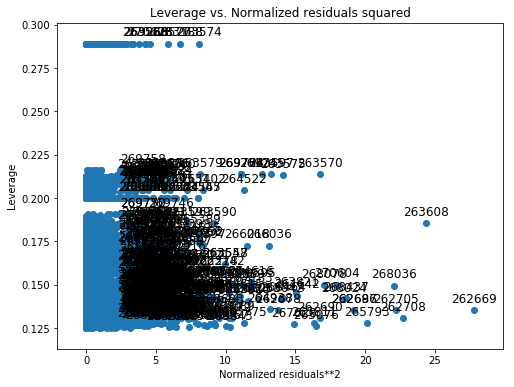

In [37]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(quality, ax = ax)

In [40]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(quality.resid, quality.model.exog)
zip(name, test)

[('Lagrange multiplier statistic', 2922.6505029461846),
 ('p-value', 8.7531801776196254e-89),
 ('f-value', 2.4725851758300434),
 ('f p-value', 1.9149284544520635e-133)]

In [43]:
from statsmodels.stats.diagnostic import kstest_normal
kstest_normal(quality.resid)

(0.020075505460273257, 2.9552348140688716e-08)

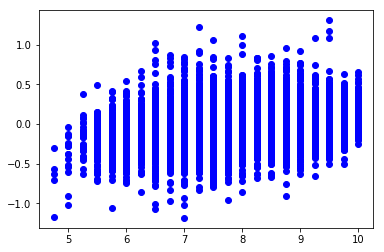

In [27]:
plt.plot(comp_owg.judge_score, quality.resid, 'bo')

In [93]:
skater_judge = ols('judge_score ~ C(skater, Treatment) + C(judge, Treatment)', data=comp).fit()

In [94]:
skater_judge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     987.3
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:23:25   Log-Likelihood:                -59537.
No. Observations:               89105   AIC:                         1.202e+05
Df Residuals:                   88525   BIC:                         1.257e+05
Df Model:                         579                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                6.1718      0.055    111.957      0.000       6.064       6.280
C(skater, Treatment)[T.Adam RIPPON]                                      2.9794      0.054     54.746      0.000       2.873       3.086
C(skater, Treatment)[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.5335      0.071     -7.462      0.000      -0.674      -0.393
C(skater, Treatment)[T.Adele MORRISON / Demid ROKACHEV]                 -1.2353      0.071    -17.280      0.000      -1.375      -1.095
C(skater, Treatment)[T.Aimee BUCHANAN]                                  -1.1006      0.072    -15.370      0.000      -1.241      -0.960
C(skater, Treatment)[T.Aiza MAMBEKOVA]                                  -0.2405      0.072     -3.351      0.001      -0.381      -0.100
C(skater, Treatment)[T.Alaine CHARTRAND]                                 1.5147      0.055     27.760      0.000       1.408       1.622
C(skater, Treatment)[T.Alena LEONOVA]                                    1.6885      0.058     28.968      0.000       1.574       1.803
C(skater, Treatment)[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.2207      0.056     39.339      0.000       2.110       2.331
C(skater, Treatment)[T.Alexander BOROVOJ]                               -0.5824      0.087     -6.670      0.000      -0.754      -0.411
C(skater, Treatment)[T.Alexander MAJOROV]                                1.3990      0.055     25.311      0.000       1.291       1.507
C(skater, Treatment)[T.Alexander MASZLJANKO]                            -0.4557      0.088     -5.202      0.000      -0.627      -0.284
C(skater, Treatment)[T.Alexander PETROV]                                 1.6421      0.058     28.199      0.000       1.528       1.756
C(skater, Treatment)[T.Alexander SAMARIN]                                2.0882      0.056     36.988      0.000       1.978       2.199
C(skater, Treatment)[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8882      0.056     34.018      0.000       1.779       1.997
C(skater, Treatment)[T.Alexandra PAUL / Mitchell ISLAM]                  1.7702      0.072     24.740      0.000       1.630       1.910
C(skater, Treatment)[T.Alexandra STEPANOVA / Ivan BUKIN]                 3.0493      0.054     56.314      0.000       2.943       3.155
C(skater, Treatment)[T.Alexei BYCHENKO]                                  2.2234      0.054     41.238      0.000       2.118       2.329
C(skater, Treatment)[T.Alexia PAGANINI]                                  0.4276      0.072      5.964      0.000       0.287       0.568
C(skater, Treatment)[T.Alicia PINEAULT]                              

In [73]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(skater_judge.resid, skater_judge.model.exog)
zip(name, test)

[('Lagrange multiplier statistic', 1982.9675733275742),
 ('p-value', 3.6664485119151038e-275),
 ('f-value', 9.5740756351537026),
 ('f p-value', 3.9712627445653009e-297)]

In [74]:
sm.stats.diagnostic.kstest_normal(skater_judge.resid)

(0.027391105331870613, 2.0934369146384404e-31)

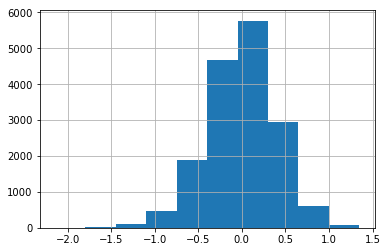

In [75]:
skater_judge.resid.hist()

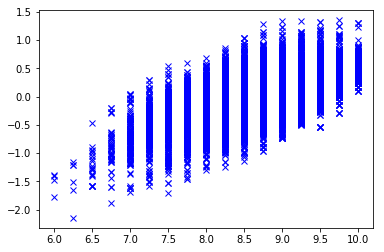

In [76]:
plt.plot(skater_judge.model.endog, skater_judge.resid, 'bx')

In [89]:
skater_judge_country = ols(
    'judge_score ~ C(skater, Treatment) + C(judge, Treatment) + C(same_country, Treatment)',
    data=comp_trim).fit()

In [90]:
skater_judge_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     666.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:17:02   Log-Likelihood:                -32600.
No. Observations:               52358   AIC:                         6.595e+04
Df Residuals:                   51985   BIC:                         6.925e+04
Df Model:                         372                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              5.9507      0.080     74.004      0.000       5.793       6.108
C(skater, Treatment)[T.Adam RIPPON]                                    3.0873      0.075     41.099      0.000       2.940       3.235
C(skater, Treatment)[T.Adel TANKOVA / Ronald ZILBERBERG]              -0.6017      0.216     -2.792      0.005      -1.024      -0.179
C(skater, Treatment)[T.Adele MORRISON / Demid ROKACHEV]               -1.0400      0.097    -10.693      0.000      -1.231      -0.849
C(skater, Treatment)[T.Aimee BUCHANAN]                                -0.3885      0.216     -1.801      0.072      -0.811       0.034
C(skater, Treatment)[T.Aiza MAMBEKOVA]                                -0.3383      0.103     -3.277      0.001      -0.541      -0.136
C(skater, Treatment)[T.Alaine CHARTRAND]                               1.6301      0.075     21.622      0.000       1.482       1.778
C(skater, Treatment)[T.Alena LEONOVA]                                  1.8160      0.078     23.334      0.000       1.663       1.969
C(skater, Treatment)[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]          2.3223      0.077     30.262      0.000       2.172       2.473
C(skater, Treatment)[T.Alexander PETROV]                               1.7409      0.078     22.316      0.000       1.588       1.894
C(skater, Treatment)[T.Alexander SAMARIN]                              2.3518      0.079     29.837      0.000       2.197       2.506
C(skater, Treatment)[T.Alexandra PAUL / Mitchell ISLAM]                1.9144      0.091     21.051      0.000       1.736       2.093
C(skater, Treatment)[T.Alexandra STEPANOVA / Ivan BUKIN]               3.1834      0.076     42.113      0.000       3.035       3.332
C(skater, Treatment)[T.Alexei BYCHENKO]                                2.4027      0.080     30.045      0.000       2.246       2.559
C(skater, Treatment)[T.Alicia PINEAULT]                                0.8150      0.089      9.138      0.000       0.640       0.990
C(skater, Treatment)[T.Alina ZAGITOVA]                                 2.9264      0.077     37.836      0.000       2.775       3.078
C(skater, Treatment)[T.Alisa EFIMOVA / Alexander KOROVIN]              1.1814      0.087     13.539      0.000       1.010       1.352
C(skater, Treatment)[T.Aljona SAVCHENKO / Bruno MASSOT]                3.6887      0.077     47.882      0.000       3.538       3.840
C(skater, Treatment)[T.Alla LOBODA / Pavel DROZD]                      2.0659      0.081     25.629      0.000       1.908       2.224
C(skater, Treatment)[T.Amber GLENN]                                    1.2914      0.089     14.538      0.000   

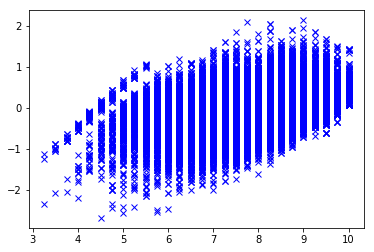

In [92]:
plt.plot(skater_judge_country.model.endog, skater_judge_country.resid, 'bx')

In [30]:
sm.stats.anova_lm(skater_judge, skater_judge_country)

/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,51986.0,11043.748206,0.0,NaN,NaN,NaN
1,51850.0,10357.771068,136.0,685.977138,25.249524,0.0
